In [7]:
import pandas as pd
url='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df=pd.read_csv(url,names=['sepal length','sepal width','petal length','petal width','target'])
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
features=['sepal length','sepal width','petal length','petal width']
x=df.loc[:,features].values
y=df.loc[:,['target']].values

In [18]:
from sklearn.decomposition import PCA
pca=PCA(n_components=3)
PrincipalComponents=pca.fit_transform(x)
PrincipalDF=pd.DataFrame(data=PrincipalComponents,columns=['Principal Component 1','Principal Component 2','Principal Component 3'])
PrincipalDF.head()

,Principal Component 1,Principal Component 2,Principal Component 3
0,-2.684207,0.326607,-0.021512
1,-2.715391,-0.169557,-0.203521
2,-2.889820,-0.137346,0.024709
3,-2.746437,-0.311124,0.037672
4,-2.728593,0.333925,0.096230


In [24]:
finalDF=pd.concat([PrincipalDF,df[['target']]],axis=1)
finalDF.head()

,Principal Component 1,Principal Component 2,Principal Component 3,target
0,-2.684207,0.326607,-0.021512,Iris-setosa
1,-2.715391,-0.169557,-0.203521,Iris-setosa
2,-2.889820,-0.137346,0.024709,Iris-setosa
3,-2.746437,-0.311124,0.037672,Iris-setosa
4,-2.728593,0.333925,0.096230,Iris-setosa


In [25]:
x_vals=finalDF['Principal Component 1']
y_vals=finalDF['Principal Component 2']
z_vals=finalDF['Principal Component 3']

In [30]:
df['target'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: target, dtype: int64

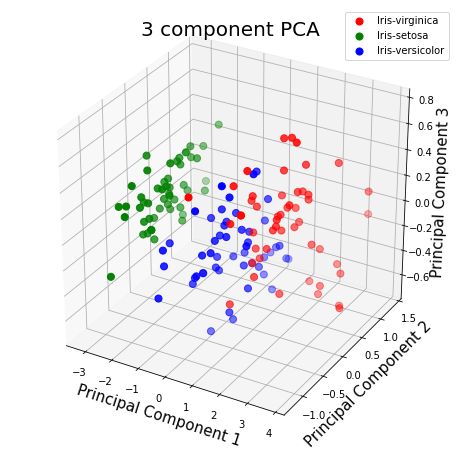

In [35]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#create the figure

fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111,projection='3d')
ax.set_xlabel('Principal Component 1',fontsize=15)
ax.set_ylabel('Principal Component 2',fontsize=15)
ax.set_zlabel('Principal Component 3',fontsize=15)
ax.set_title('3 component PCA',fontsize=20)

targets=['Iris-virginica','Iris-setosa','Iris-versicolor']
colors=['r','g','b']

for target, color in zip(targets,colors):
  indicesToKeep=finalDF['target']==target
  ax.scatter(finalDF.loc[indicesToKeep,'Principal Component 1'],
             finalDF.loc[indicesToKeep,'Principal Component 2'],
             finalDF.loc[indicesToKeep,'Principal Component 3'],c=color,s=50)
ax.legend(targets)  
ax.grid()
plt.show()

NameError: ignored